# Proyek Analisis Data: Air Quality Dataset

1.   [Air Quality Dataset (sumber)](https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr/view)


- **Nama:** Yonathan Tirza Karsono
- **Email:** yonaatk1@gmail.com
- **ID Dicoding:** yonathantirzakarsono

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kadar polutan dan gas di kota Nongzhanguan dalam kurun waktu 2013 - 2017 ?
- Pertanyaan 2 : Seperti apakah korelasi antara temperatur dan curah hujan ?

## Import Semua Packages/Library yang Digunakan

In [46]:
!pip install gdown
import gdown
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

## Data Wrangling

### Gathering Data

In [47]:
file_id = "1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "air_quality_dataset.zip", quiet=False)

with zipfile.ZipFile("air_quality_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv("/content/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/air_quality_dataset.zip
100%|██████████| 7.96M/7.96M [00:00<00:00, 107MB/s]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- Dataset merupakan data mengenai kualitas udara di Kota Nongzhanguan, China pada tahun 2013 - 2017
- Dataset memiliki berbagai atribut yang terkandung dalam udara seperti polutan dan gas serta temperatur, tekanan, serta arah dan kecepatan udara
- Dataset juga menunjukkan jika terjadi hujan dan mencatat curah hujan dalam dataset ini

### Assessing Data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Dataset berisi berbagai data dengan tipe float dan integer untuk data kuantitatif.
- Dataset memiliki tipe data object untuk data kategorikal seperti 'station' (kota di China yang kualitas udaranya dicatat dalam dataset ini), dan juga 'wd' untuk arah angin.
- Dataset ini memiliki 35064 baris namun terdapat beberapa data yang kosong pada berbagai atribut

In [49]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


**Insight:**
- Dataset ini memiliki berbagai atribut dengan value kosong, untuk menentukan jika value ini berpengaruh besar terhadap keseluruhan data, maka perlu menelusuri empty value tersebut secara lebih mendalam

In [50]:
df[df["wd"].isna()][df["WSPM"] > 0.0 ]

<ipython-input-50-85ef7fbc3dcb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["wd"].isna()][df["WSPM"] > 0.0 ]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20853,20854,2015,7,17,21,53.0,63.0,4.0,48.0,1300.0,90.0,23.700,1002.30,21.6,0.0,NaN,0.1,Nongzhanguan
23035,23036,2015,10,16,19,285.0,285.0,26.0,138.0,2600.0,91.0,16.700,1012.60,12.6,0.0,NaN,0.2,Nongzhanguan
23059,23060,2015,10,17,19,354.0,354.0,16.0,184.0,2700.0,29.0,16.000,1013.60,13.3,0.0,NaN,0.1,Nongzhanguan
23356,23357,2015,10,30,4,10.0,16.0,5.0,54.0,400.0,4.0,0.700,1026.70,-3.8,0.0,NaN,0.2,Nongzhanguan
25756,25757,2016,2,7,4,65.0,65.0,30.0,78.0,2000.0,10.0,-5.900,1018.70,-14.2,0.0,NaN,0.2,Nongzhanguan
26427,26428,2016,3,6,3,48.0,115.0,18.0,86.0,1400.0,6.0,-0.100,1016.00,-8.1,0.0,NaN,0.1,Nongzhanguan
28109,28110,2016,5,15,5,75.0,75.0,2.0,76.0,500.0,3.0,12.300,1010.30,11.2,0.0,NaN,0.2,Nongzhanguan
29764,29765,2016,7,23,4,109.0,109.0,2.0,114.0,1300.0,11.0,26.100,996.30,24.9,0.0,NaN,0.2,Nongzhanguan
30604,30605,2016,8,27,4,21.0,35.0,2.0,70.0,500.0,2.0,17.900,1010.10,13.0,0.0,NaN,1.1,Nongzhanguan
31054,31055,2016,9,14,22,67.0,67.0,2.0,65.0,900.0,40.0,25.500,1011.25,18.3,0.0,NaN,0.5,Nongzhanguan


**Insight:**
- Data di atas menunjukkan setiap baris yang memiliki <b>missing value</b> pada kolom '<b>wd</b>' (wind direction) dan <b>memiliki nilai</b> pada kolom '<b>WSPM</b>' (wind speed per minute). Hal ini dapat berarti bahwa sensor yang menangkap arah angin tidak bekerja pada waktu tersebut, meskipun kecepatan angin tercatat. Hal ini dapat ditangani dengan melakukan imputasi pada kolom 'wd' tersebut yang akan dilakukan pada tahap <b>Data Cleaning</b>.

In [51]:
df[df["wd"].isna()][df["WSPM"].isna()]

<ipython-input-51-ef688a2a525d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["wd"].isna()][df["WSPM"].isna()]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
31315,31316,2016,9,25,19,168.0,180.0,9.0,53.0,2500.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
31316,31317,2016,9,25,20,137.0,173.0,8.0,31.0,1600.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
31317,31318,2016,9,25,21,112.0,128.0,7.0,27.0,1500.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
31318,31319,2016,9,25,22,94.0,108.0,6.0,27.0,1400.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
31319,31320,2016,9,25,23,85.0,102.0,5.0,28.0,1200.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34083,34084,2017,1,19,3,102.0,142.0,46.0,83.0,3100.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34084,34085,2017,1,19,4,141.0,166.0,54.0,78.0,2700.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34085,34086,2017,1,19,5,118.0,145.0,48.0,71.0,2500.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan


**Insight:**
- Data di atas ditujukan untuk menampilkan setiap data yang memiliki missing value baik pada kolom '<b>wd</b>' maupun '<b>WSPM</b>'
- Data ini menunjukkan informasi yang tidak diperkirakan sebelumnya, dimana data juga kehilangan value pada kolom <b>['TEMP', 'PRES', 'DEWP', 'RAIN']</b>
- Data ini juga menunjukkan bahwa pada tanggal <b>19-1-2017</b>, data memiliki missing value selama 4 jam berturut-turut dari jam 3 - 7. Hal ini dapat berarti bahwa terjadi kegagalan pada alat yang disebabkan oleh faktor tertentu. Jika dilakukan analisis yang sama pada dataset kota lain, hal yang sama juga muncul, terdapat missing value pada tanggal yang sama dan waktu yang sama, yang mana mengindikasikan terjadinya kegagalan alat sensor di berbagai kota di China.

In [52]:
df[df['year'] == 2017][df['month'] == 1][df['day'] == 19]

<ipython-input-52-8efc9bc82282>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['year'] == 2017][df['month'] == 1][df['day'] == 19]
<ipython-input-52-8efc9bc82282>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['year'] == 2017][df['month'] == 1][df['day'] == 19]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
34080,34081,2017,1,19,0,69.0,94.0,23.0,81.0,1400.0,3.0,-2.900000,1026.500000,-12.1,0.0,SW,1.2,Nongzhanguan
34081,34082,2017,1,19,1,79.0,107.0,32.0,83.0,2100.0,3.0,-1.925000,1025.500000,-10.6,0.0,SE,1.5,Nongzhanguan
34082,34083,2017,1,19,2,88.0,123.0,42.0,85.0,2700.0,3.0,-1.700000,1025.000000,-9.6,0.0,SE,1.0,Nongzhanguan
34083,34084,2017,1,19,3,102.0,142.0,46.0,83.0,3100.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34084,34085,2017,1,19,4,141.0,166.0,54.0,78.0,2700.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34085,34086,2017,1,19,5,118.0,145.0,48.0,71.0,2500.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34086,34087,2017,1,19,6,101.0,137.0,39.0,68.0,2800.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34087,34088,2017,1,19,7,99.0,131.0,32.0,69.0,2600.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan
34088,34089,2017,1,19,8,100.0,129.0,30.0,72.0,2600.0,5.0,NaN,NaN,NaN,NaN,NW,1.1,Nongzhanguan
34089,34090,2017,1,19,9,89.0,108.0,30.0,70.0,200.0,7.0,-2.850000,1024.000000,-7.9,0.0,NW,3.3,Nongzhanguan


**Insight:**
- Data di atas menampilkan data lebih detail pada tanggal 19-1-2017
- Dapat terlihat bahwa kehilangan data mulai terjadi pada jam 3 - 7
- Karena jumlah data yang seperti ini hanya sekitar 14 baris, maka dapat dilakukan penghapusan pada baris serupa, ataupun imputasi pada baris yang memiliki missing value seperti di atas

In [53]:
print("Jumlah data duplikat : " , df.duplicated().sum())

Jumlah data duplikat :  0


**Insight:**
- Dataset ini tidak memiliki data duplikat

In [54]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- tidak terdapat keanehan dalam parameter statistik di atas


### Cleaning Data

In [55]:
missing_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[missing_cols] = df[missing_cols].interpolate(method='linear')

**Insight:**
- Dilakukan imputasi terhadap data yang memiliki missing value pada kolom kolom di atas
- Imputasi menggunakan metode interpolasi linear dimana data diinput dengan nilai estimasi dan berasumsi bahwa data tersebut merupakan data linear dan menentukan nilai berdasarkan nilai sekitar missing value tersebut
- Metode imputasi ini dilakukan dengan harapan agar analisis dapat berjalan dengan baik

In [56]:
df['wd'] = df.groupby(['year', 'month', 'day'])['wd'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

**Insight:**
- Missing value untuk kolom 'wd' diinput dengan menggunakan modus dari berdasarkan tanggal tersebut. Misal untuk kasus tanggal 2017-1-19, data 'wd' memiliki modus 'NW', sehingga untuk missing value akan berisi 'NW' seperti berikut:

In [57]:
df[df['year'] == 2017][df['month'] == 1][df['day'] == 19]

<ipython-input-57-8efc9bc82282>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['year'] == 2017][df['month'] == 1][df['day'] == 19]
<ipython-input-57-8efc9bc82282>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['year'] == 2017][df['month'] == 1][df['day'] == 19]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
34080,34081,2017,1,19,0,69.0,94.0,23.0,81.0,1400.0,3.0,-2.900000,1026.500000,-12.100000,0.0,SW,1.200000,Nongzhanguan
34081,34082,2017,1,19,1,79.0,107.0,32.0,83.0,2100.0,3.0,-1.925000,1025.500000,-10.600000,0.0,SE,1.500000,Nongzhanguan
34082,34083,2017,1,19,2,88.0,123.0,42.0,85.0,2700.0,3.0,-1.700000,1025.000000,-9.600000,0.0,SE,1.000000,Nongzhanguan
34083,34084,2017,1,19,3,102.0,142.0,46.0,83.0,3100.0,4.0,-1.864286,1024.857143,-9.357143,0.0,NW,1.016667,Nongzhanguan
34084,34085,2017,1,19,4,141.0,166.0,54.0,78.0,2700.0,49.0,-2.028571,1024.714286,-9.114286,0.0,NW,1.033333,Nongzhanguan
34085,34086,2017,1,19,5,118.0,145.0,48.0,71.0,2500.0,7.0,-2.192857,1024.571429,-8.871429,0.0,NW,1.050000,Nongzhanguan
34086,34087,2017,1,19,6,101.0,137.0,39.0,68.0,2800.0,5.0,-2.357143,1024.428571,-8.628571,0.0,NW,1.066667,Nongzhanguan
34087,34088,2017,1,19,7,99.0,131.0,32.0,69.0,2600.0,4.0,-2.521429,1024.285714,-8.385714,0.0,NW,1.083333,Nongzhanguan
34088,34089,2017,1,19,8,100.0,129.0,30.0,72.0,2600.0,5.0,-2.685714,1024.142857,-8.142857,0.0,NW,1.100000,Nongzhanguan
34089,34090,2017,1,19,9,89.0,108.0,30.0,70.0,200.0,7.0,-2.850000,1024.000000,-7.900000,0.0,NW,3.300000,Nongzhanguan


**Insight:**
Dengan demikian, tidak lagi terdapat missing value setelah proses data cleaning

In [58]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


## Exploratory Data Analysis (EDA)

### Eksplorasi Polutan dan Gas

In [59]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
df[pollutants].describe()

,PM2.5,PM10,SO2,NO2,CO,O3
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876
std,86.692516,96.088407,24.379948,36.380351,1257.098704,58.330590
min,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200
25%,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000
50%,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000
75%,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000
max,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000


**Insight:**
- Parameter statistik di atas menunjukkan tentang kadar polutan dan gas pada dataset
- Tabel menunjukkan bahwa kadar CO memiliki nilai maks tertinggi

#### Aggregasi untuk memantau kadar polutant per tahun

Code dibawah ini akan menunjukkan kadar maksimal serta rata rata dari setiap polutan dan gas setiap tahunnya (2013 - 2017)

In [60]:
df.groupby(df['year']).agg({
    'PM2.5': ['max', 'mean'],
    'PM10': ['max', 'mean'],
    'CO': ['max', 'mean'],
    'NO2': ['max', 'mean'],
    'SO2':[ 'max', 'mean']
})

PM2.5               PM10                   CO                 NO2  \
        max        mean    max        mean      max         mean    max   
year                                                                      
2013  844.0   84.377996  811.0  103.735090   9800.0  1294.818015  273.0   
2014  809.0   91.998082  907.0  127.224053   9400.0  1353.613014  234.0   
2015  667.0   85.178584  899.0  106.989172  10000.0  1382.773973  265.0   
2016  566.0   76.096539  995.0   97.046790   9400.0  1209.369308  206.0   
2017  835.0  101.027542  939.0  119.663842   9700.0  1732.944915  194.0   

                   SO2             
           mean    max       mean  
year                               
2013  59.518205  234.0  23.243093  
2014  62.296895  208.0  24.876495  
2015  58.249709  168.0  15.809857  
2016  52.538764  187.0  11.556865  
2017  58.230579  257.0  20.606638

**Insight:**
- Partikel <b>PM2.5</b> mencapai kadar <b>maksimal</b> pada tahun <b>2013</b> yaitu sebesar <b>844.0</b>
- Partikel <b>PM10</b> mencapai kadar <b>maksimal</b> pada tahun <b>2016</b> yaitu sebesar <b>995.0</b>
- Partikel <b>CO</b> mencapai kadar <b>maksimal</b> pada tahun <b>2015</b> yaitu sebesar <b>10000.0</b>
- Partikel <b>NO2</b> mencapai kadar <b>maksimal</b> pada tahun <b>2013</b> yaitu sebesar <b>273.0</b>
- Partikel <b>SO2</b> mencapai kadar <b>maksimal</b> pada tahun <b>2017</b> yaitu sebesar <b>257.0</b>

#### Univariate Analysis Polutan dan Gas

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'O3'}>]],
      dtype=object)

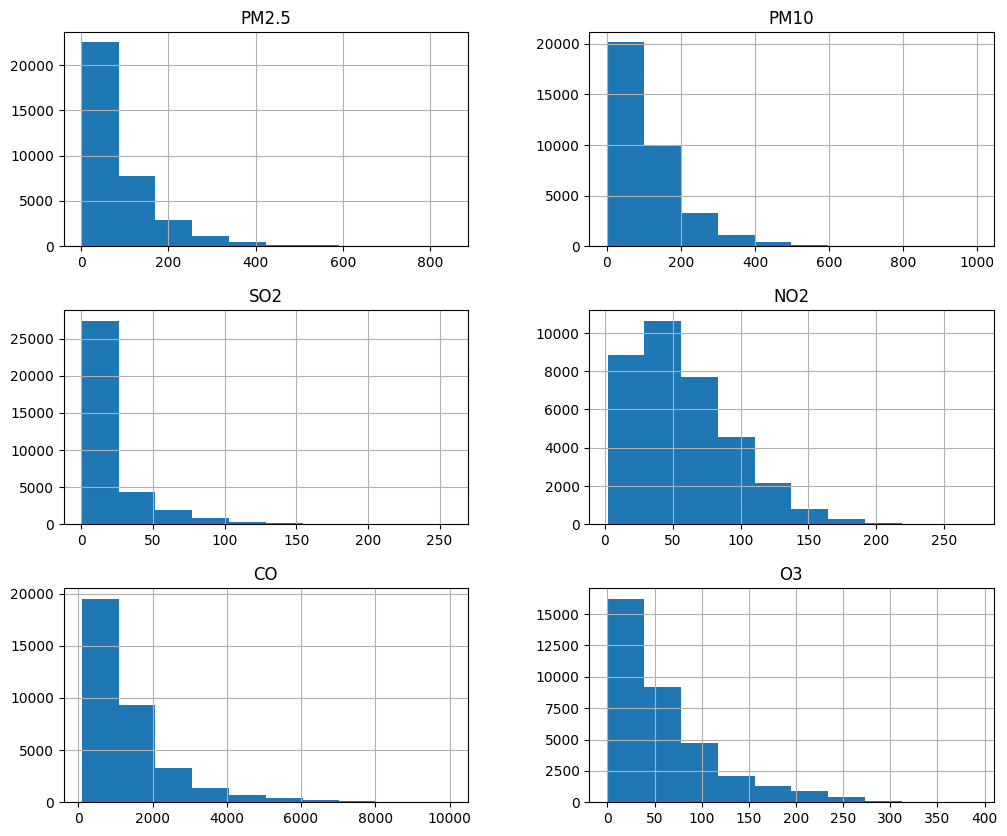

In [61]:
df[pollutants].hist(figsize = (12,10))

**Insight:**
- Histogram di atas menunjukkan distribusi data dari polutant dan gas dalam dataset
- Distribusi yang ditunjukkan oleh Histogram tersebut merupakan distribusi *right-skewed*

### Eksplorasi Atribut Udara

In [62]:
df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].describe()

,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,13.668250,1012.551871,2.445126,0.063983,1.860815
std,11.459735,10.266471,13.811939,0.786059,1.280427
min,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,23.500000,1020.900000,15.000000,0.000000,2.400000
max,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Parameter statistik di atas menunjukkan tentang kondisi udara seperti tekanan dan temperatur
- Berdasarkan tabel di atas dapat dikatakan bahwa curah hujan terbilang rendah di kota Nongzhanguan

#### Univariate Analysis Atribut Udara

array([[<Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>],
       [<Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>],
       [<Axes: title={'center': 'WSPM'}>, <Axes: >]], dtype=object)

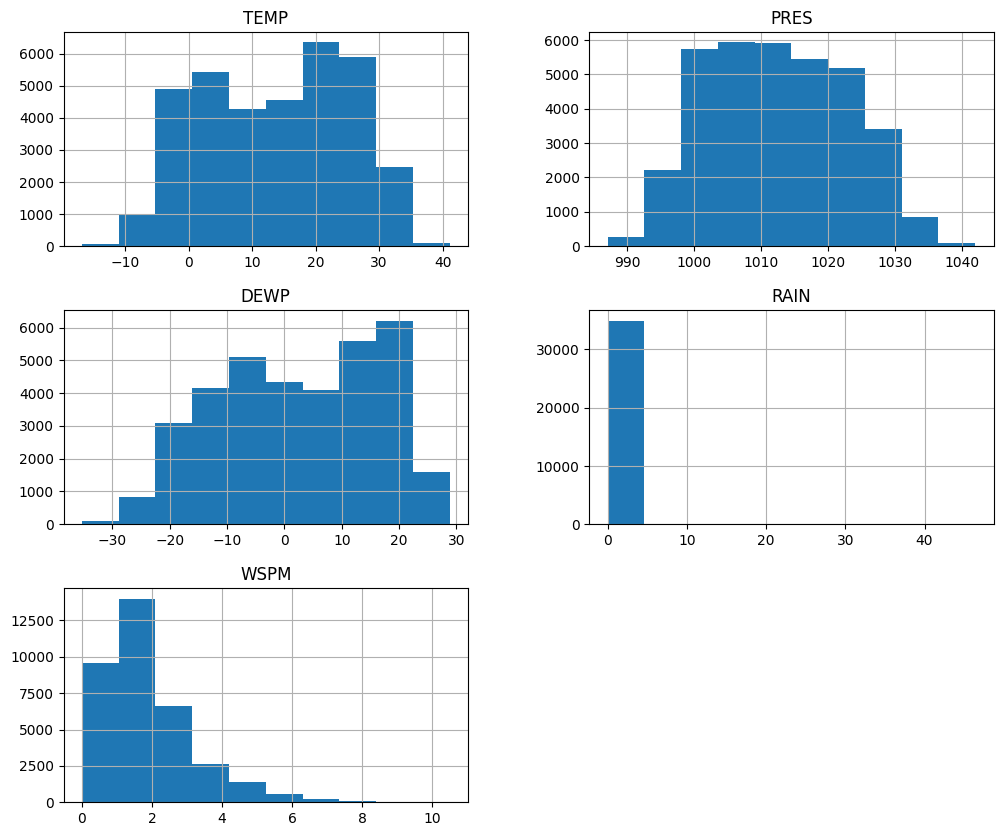

In [63]:
df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].hist(figsize = (12,10))

**Insight:**
- Histogram di atas menunjukkan distribusi data dari kondisi udara seperti tekanan, suhu, dan kecepatan angin dalam dataset
- Distribusi yang dimiliki oleh kolom TEMP dan DEWP adalah distribusi yang dinamakan distribusi bimodal, yang mana distribusi ini hampir seperti distribusi normal namun memiliki 2 puncak
- Distribusi untuk kolom PRES adalah distribusi normal
- Distribusi untuk kolom WSPM dan RAIN adalah distribusi *right-skewed*

### Korelasi dalam Data

In [64]:
df_corr = df.drop(columns=['wd', 'station']) # dihapus karena data kategorikal

In [65]:
df_corr.corr()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.016010,-0.038442,-0.232270,-0.055815,0.024209,-0.033171,-0.119346,0.173348,-0.089001,0.008327,-0.003478
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.023487,-0.038466,-0.176355,-0.070678,0.007034,-0.007601,-0.149289,0.174273,-0.152063,0.004298,0.027751
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.030635,0.000545,-0.212145,0.062310,0.068618,-0.101102,0.133329,-0.021949,0.265961,0.016578,-0.126883
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.008837,0.028551,0.003697,0.032030,-0.011843,0.001440,0.015768,0.018361,0.019999,-0.006659,-0.009561
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.019548,0.005268,-0.001104,-0.065971,-0.072496,0.302038,0.142301,-0.039186,-0.019672,0.005092,0.156643
PM2.5,-0.016010,-2.348688e-02,3.063547e-02,8.836790e-03,-1.954813e-02,1.000000,0.903852,0.536543,0.691340,0.813697,-0.187629,-0.173362,0.028121,0.097226,-0.022705,-0.301098
PM10,-0.038442,-3.846622e-02,5.446533e-04,2.855125e-02,5.267509e-03,0.903852,1.000000,0.524449,0.676476,0.741651,-0.160814,-0.145445,-0.002061,0.050930,-0.033133,-0.205768
SO2,-0.232270,-1.763547e-01,-2.121452e-01,3.697253e-03,-1.103929e-03,0.536543,0.524449,1.000000,0.502287,0.563784,-0.192710,-0.360466,0.232758,-0.265932,-0.045236,-0.155726
NO2,-0.055815,-7.067787e-02,6.231040e-02,3.203016e-02,-6.597082e-02,0.691340,0.676476,0.502287,1.000000,0.702669,-0.521079,-0.302299,0.129807,-0.018488,-0.051769,-0.467683
CO,0.024209,7.034453e-03,6.861826e-02,-1.184336e-02,-7.249591e-02,0.813697,0.741651,0.563784,0.702669,1.000000,-0.313067,-0.317610,0.149046,-0.017588,-0.013407,-0.338262


**Insight:**
- Tabel di atas menunjukkan korelasi antar fitur dari dataset ini
- Dapat dilihat bahwa korelasi antar berbagai jenis polutan satu sama lain memiliki korelasi yang tinggi
- Korelasi ini akan nampak lebih jelas di bagian selanjutnya

#### Bivariate Analysis berdasarkan korelasi

Dari hasil korelasi diatas ditemukan beberapa korelasi yang tinggi pada berbagai zat polutan. Di sini akan ditelusuri lebih lanjut bagaimana hubungan zat tersebut

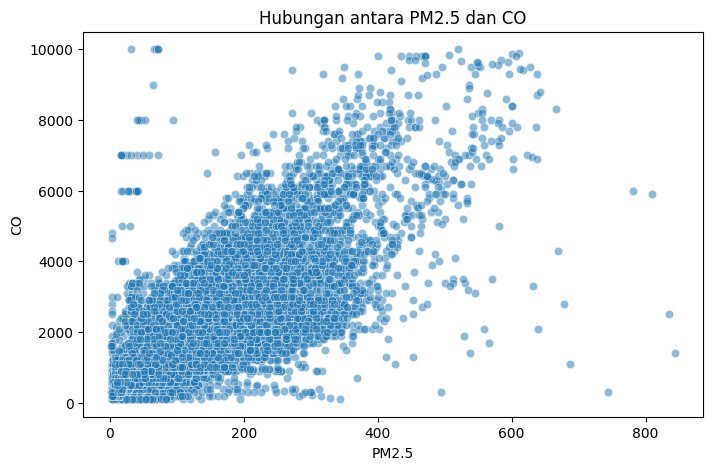

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["PM2.5"], y=df["CO"], alpha=0.5)
plt.title("Hubungan antara PM2.5 dan CO")
plt.xlabel("PM2.5")
plt.ylabel("CO")
plt.show()

**Insight:**
- Scatter plot diatas menggambarkan korelasi antar PM2.5 dan CO dengan cara menggambarkan dot yang mewakili nilai kedua kolom tersebut pada waktu tertentu dalam data
- Scatter plot diatas menunjukkan tren naik, yang berarti bahwa kedua zat ini berbanding lurus dimana jika kadar CO naik, maka kadar PM2.5 juga akan naik. Hal ini berarti bahwa kedua zat tersebut memiliki korelasi yang tinggi
- Analisis yang sama akan dilakukan terhadap zat zat berikut:

```
- PM2.5 & PM10
- PM2.5 & CO
- PM2.5 & NO2
- PM2.5 & SO2
- PM10 & CO
- PM10 & NO2
- PM10 & SO2
- SO2 & CO
- SO2 & NO2
- NO2 & CO

```



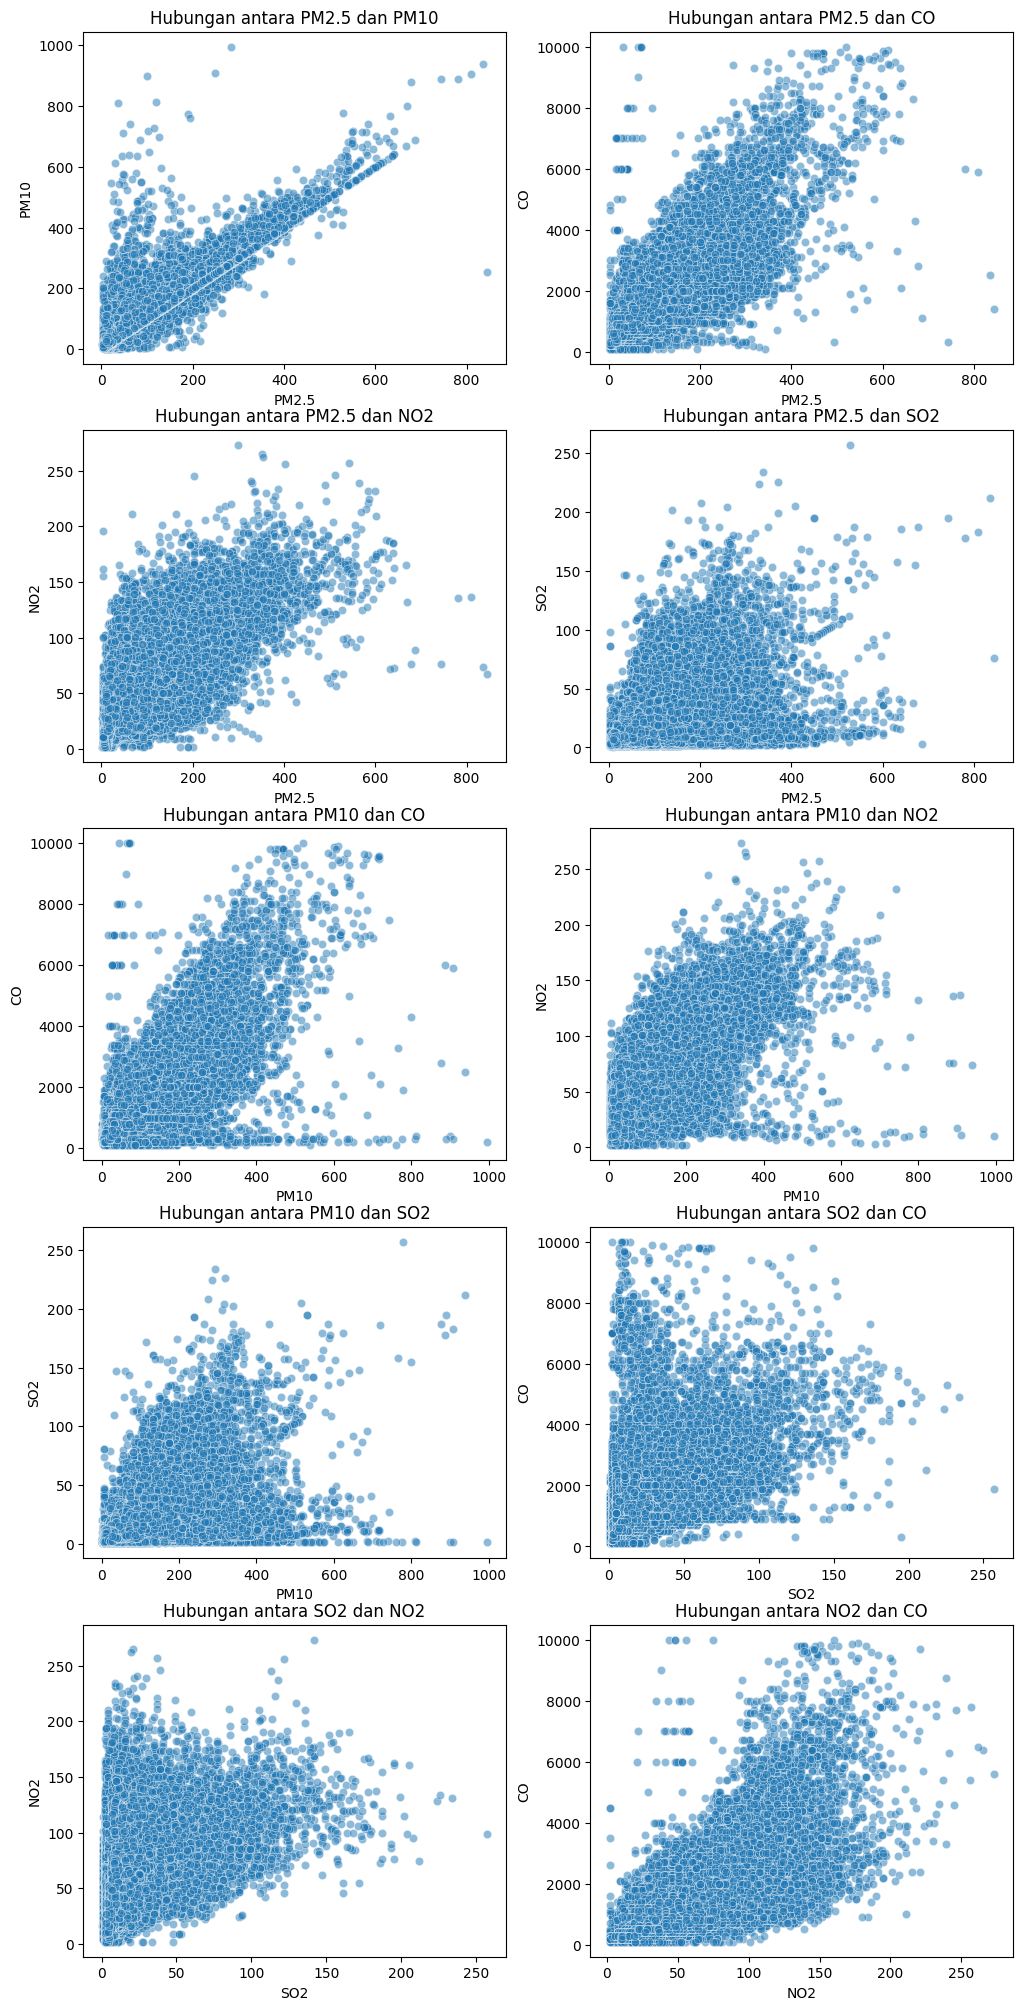

In [67]:
pollutant_pairs = [
    ('PM2.5', 'PM10'), ('PM2.5', 'CO'), ('PM2.5', 'NO2'), ('PM2.5', 'SO2'),
    ('PM10', 'CO'), ('PM10', 'NO2'), ('PM10', 'SO2'),
    ('SO2', 'CO'), ('SO2', 'NO2'), ('NO2', 'CO')
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))
axes = axes.flatten()

for i, (x, y) in enumerate(pollutant_pairs):
    sns.scatterplot(x=df[x], y=df[y], alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Hubungan antara {x} dan {y}")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.show()

**Insight:**
- Scatter plot tersebut menunjukkan bahwa berbagai korelasi ini memiliki korelasi dari yang sedang hingga tinggi
- Korelasi paling tinggi dimiliki oleh PM2.5 dan PM10 karena nilai korelasi 0.903852
- Scatter plot untuk PM2.5 dan PM10 juga menunjukkan bahwa keduanya memiliki korelasi yang tinggi

#### Bivariate Analysis antara TEMP dan RAIN

Analisis ini ditujukan untuk menjawab pertanyaan 2 dimana akan menentukan bagaimana korelasi antara temperatur dan curah hujan

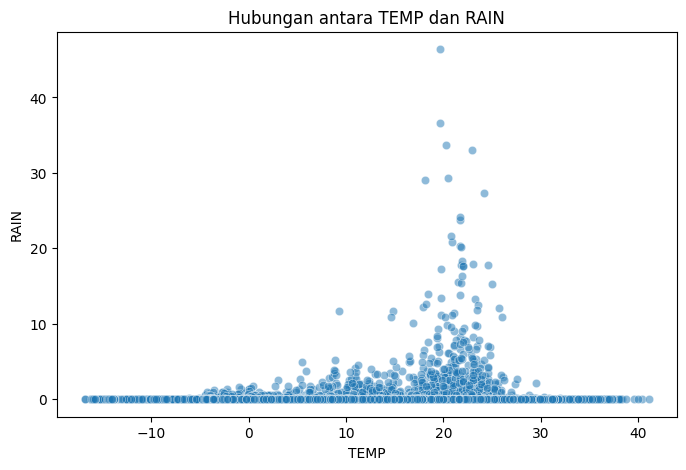

In [68]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["TEMP"], y=df["RAIN"], alpha=0.5)
plt.title("Hubungan antara TEMP dan RAIN")
plt.xlabel("TEMP")
plt.ylabel("RAIN")
plt.show()

**Insight:**

- Korelasi antara TEMP dan RAIN pada tabel korelasi sebelumnyan menunjukkan nilai 0.038667, yang sudah tidak menjanjikan bahwa ada korelasi sama sekali antara keduanya
- Scatter plot menunjukkan bahwa korelasi yang dimiliki oleh temperatur dan curah hujan ini sangatlah lemah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kadar polutan dan gas di kota Nongzhanguan dalam kurun waktu 2013 - 2017 ?



In [69]:
# Membuat tahun menjadi index untuk membuat plot
df.set_index('year', inplace=True)
df.index = df.index.astype(str) # string agar plot tidak menunjukkan tahun sebagai floating point

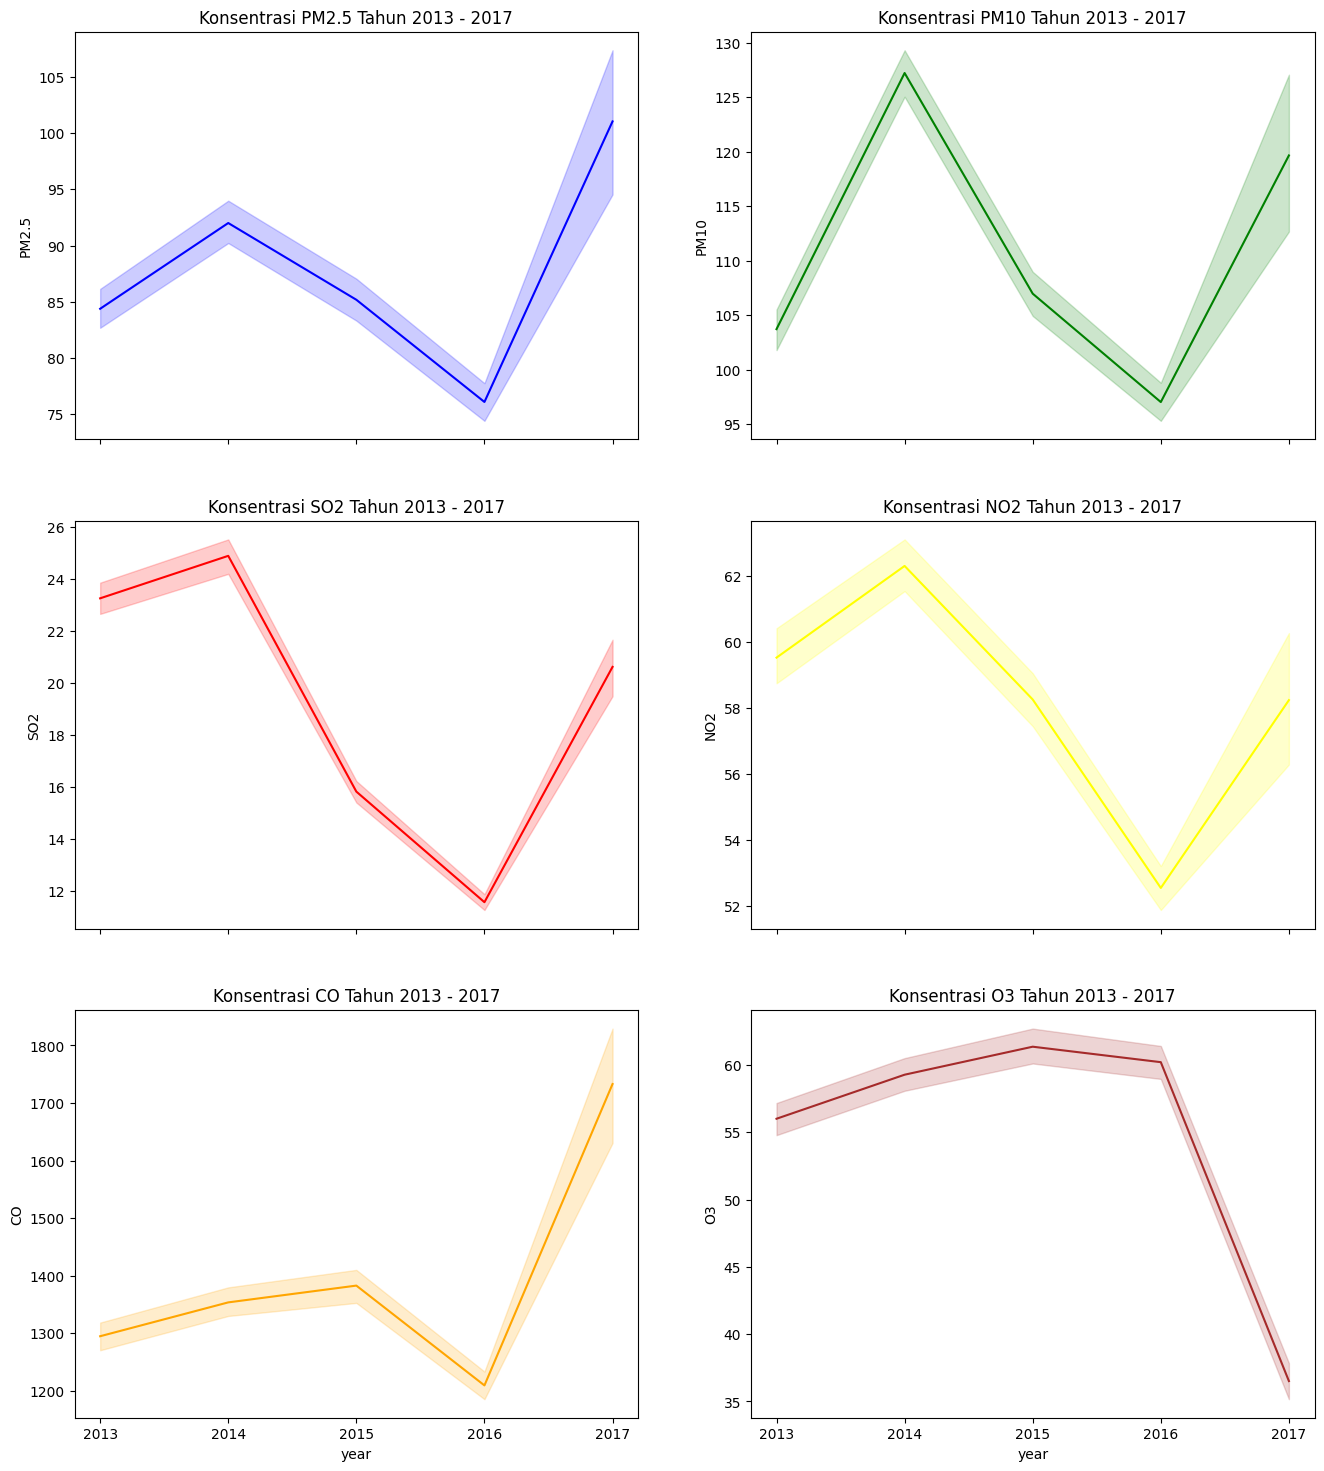

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18), sharex=True)

axes = axes.flatten()

colors = ['blue', 'green', 'red', 'yellow', 'orange', 'brown']

for index, pollutant in enumerate(pollutants):
  sns.lineplot(ax=axes[index], data=df, x=df.index, y=pollutant, color=colors[index])
  axes[index].set_title(f"Konsentrasi {pollutant} Tahun 2013 - 2017")
  axes[index].set_ylabel(f"{pollutant}")

plt.show()

**Insight:**
- Berdasarkan graf di atas dapat dilihat bahwa konsentrasi sebagian besar polutan mengalami penurunan pada tahun 2016, namun mengalami kenaikan menuju tahun 2017
- Poin pertama benar untuk semua polutan kecuali O3, yang mana mengalami peningkatan pada tahun 2016 dan menurun pada tahun 2017

### Pertanyaan 2: Seperti apakah korelasi antara temperatur dan curah hujan ?

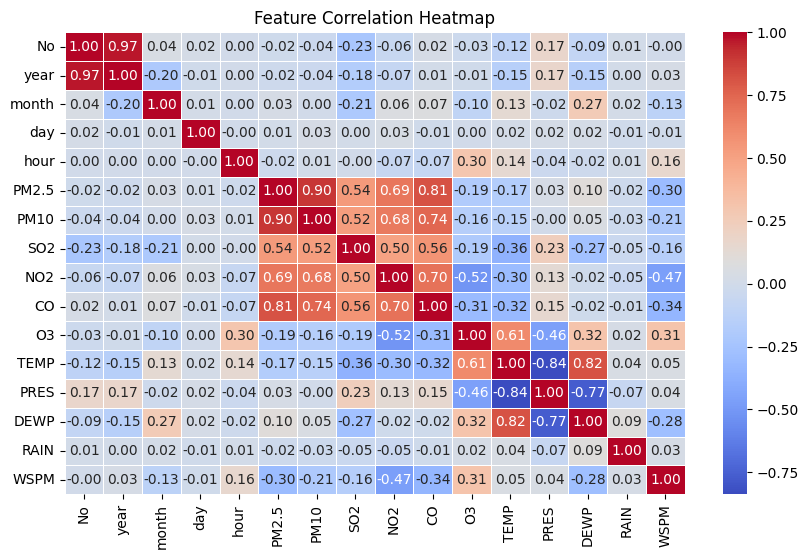

In [71]:
corr_matrix = df_corr.corr() # menggunakan dataframe untuk korelasi seperti yang digunakan pada EDA sebelumnya

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Insight:**
- Korelasi antara temperatur dan curah hujan ternyata sangat kecil
- Korelasi CO dengan PM2.5 memiliki korelasi yang cukup tinggi, hal ini dapat terjadi karena kedua zat ini dihasilkan dari sumber yang sama, seperti mesin kendaraan dan emisi limbah dari industri

## Analisis Lanjutan : Binning

In [72]:
category_df = pd.DataFrame()

labels = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]

binning_rules = {
    'PM2.5':  {'bins': [0, 35, 75, 115, 150, 250, float("inf")], 'labels': labels},
    'PM10':   {'bins': [0, 50, 150, 250, 350, 420, float("inf")], 'labels': labels},
    'SO2':    {'bins': [0, 150, 500, 650, 800, 2620, float("inf")], 'labels': labels},
    'NO2':    {'bins': [0, 100, 200, 700, 1200, 3840, float("inf")], 'labels': labels},
    'CO':     {'bins': [0, 5000, 10000, 35000, 60000, 90000, float("inf")], 'labels': labels},
    'O3':     {'bins': [0, 160, 200, 300, 400, 1200, float("inf")], 'labels': labels}
}

for pollutant in binning_rules.keys():

    category_col = f"{pollutant}_Category"
    category_df[category_col] = pd.cut(df[pollutant], bins=binning_rules[pollutant]['bins'], labels=binning_rules[pollutant]['labels'])

print(category_df)

     PM2.5_Category PM10_Category SO2_Category NO2_Category CO_Category  \
year                                                                      
2013           Good          Good         Good         Good        Good   
2013           Good          Good         Good         Good        Good   
2013           Good          Good         Good         Good        Good   
2013           Good          Good         Good         Good        Good   
2013           Good          Good         Good         Good        Good   
...             ...           ...          ...          ...         ...   
2017           Good          Good         Good         Good        Good   
2017           Good          Good         Good         Good        Good   
2017           Good          Good         Good         Good        Good   
2017           Good          Good         Good         Good        Good   
2017           Good          Good         Good         Good        Good   

     O3_Category  
year 

**Insight:**
- Analisis di atas merupakan metode binning untuk mengkategorikan masing masing polutan
- Setiap zat memiliki batasan bin yang disesuaikan sebaik mungkin dengan AQI Pollutant Breakpoints standar China agar mendapatkan analisis yang paling akurat

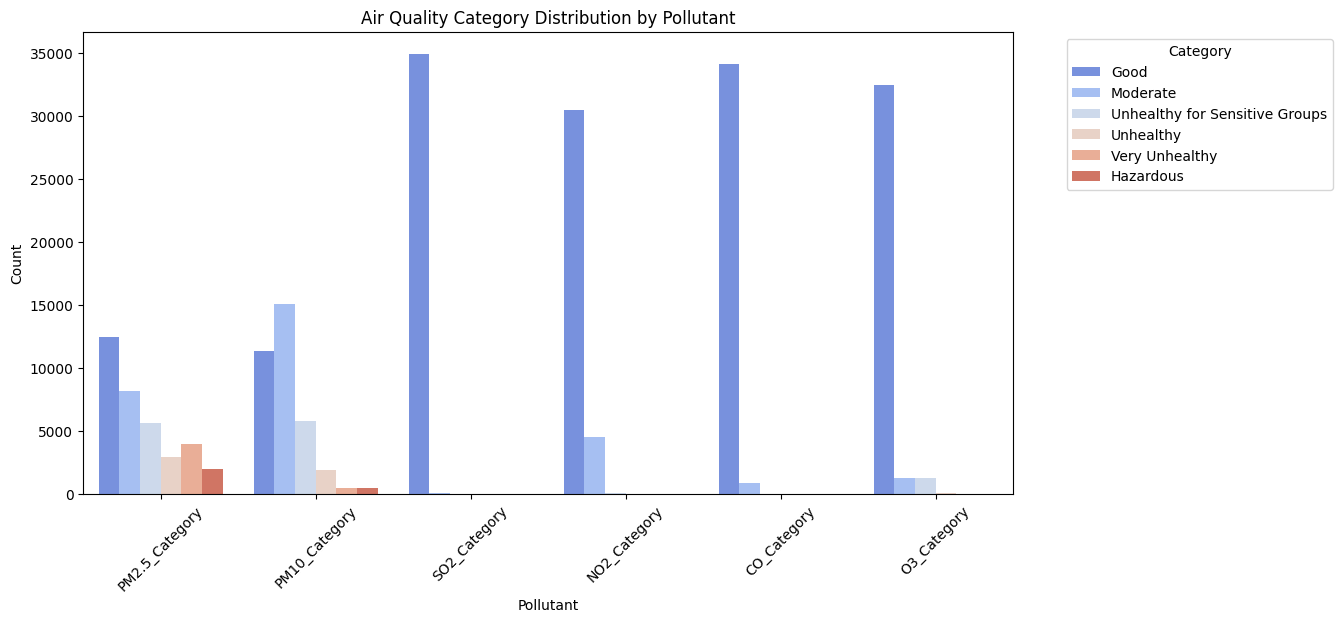

In [73]:
df_melted = category_df.melt(var_name="Pollutant", value_name="Category")

plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x="Pollutant", hue="Category", order=df_melted["Pollutant"].unique(), palette="coolwarm")

plt.title("Air Quality Category Distribution by Pollutant")
plt.xlabel("Pollutant")
plt.ylabel("Count")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Dapat dilihat bahwa konsentrasi polutan relatif rendah dan termasuk kategori aman dengan kemunculan kategori 'hazardous' paling sedikit dari semua kategori yang ada

## Conclusion

- Hasil analisis dari dataset kualitas udara di kota Nongzhanguan, China memberikan insight dan pengetahuan baru mengenai kualitas udara dan analisis data secara keseluruhan.
- Kadar polusi di kota Nongzhanguan, China mengalami penurunan pada tahun 2016, dan mengalami peningkatan pada tahun 2017. Hal ini benar untuk semua Zat kecuali O3 yang mengalami hal sebaliknya.
- Korelasi antara hujan dengan temperatur sangat kecil dengan nilai korelasi hanya sebesar 0.038667, namun ditemukan bahwa CO dan PM2.5 memiliki korelasi yang cukup besar(0.813697). Hal ini dapat mengindikasikan bahwa kedua zat tersebut muncul dari sumber yang sama.
- Korelasi tertinggi dimiliki oleh PM2.5 dengan PM10 dengan nilai korelasi sebesar 0.903852
- Korelasi terendah ditemukan pada korelasi antar TEMP dan PRES dengan nilai korelasi sebesar -0.837532, yang mengindikasikan bahwa keduanya berbanding terbalik.
- Beberapa zat lainnya juga memiliki korelasi yang tinggi dan memiliki kemungkinan yang sama seperti poin 2, dimana zat-zat tersebut berasal dari sumber yang sama.
- Analisis lanjutan menemukan bahwa kadar polutan di kota ini dapat terbilang aman dan kualitas udara kondusif.
- Partikel PM2.5 memiliki kemunculan 'hazardous' dibawah 5000 dan kemunculan kategori 'good' lebih dari 10000, menunjukkan bahwa kualitas udara di kota Nongzhanguan, China terbilang aman
- Partikel PM10 dan zat lainnya (SO2, NO2, CO, O3) juga memiliki kualitas yang baik dengan kemunculan kadar yang terbilang 'good' lebih tinggi dibanding kategori 'hazardous' menunjukkan bahwa distribusi ini bersifar *right-skewed*